<a href="https://colab.research.google.com/github/mtareqsoliman/msthesis/blob/main/100ML_10282022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+# Final Report



Importing Data:

In [13]:
import pandas as pd
import numpy as np
import math as math
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.gridspec import GridSpec
import scipy.stats as sp
from scipy.optimize import minimize, LinearConstraint
import scipy.optimize as spo
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rc
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

np.seterr(divide='ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

ecu_list = -np.random.lognormal(np.log(0.006),np.sqrt(np.log(1+0.35**2)),100)

mean = ln(0.006)
std dev = sqrt(ln(1+0.35**2))

mean = ln(
## 1- Generation of random variables:

$f(x)=\frac{1}{\zeta x\sqrt{2\pi}}exp(-\frac{1}{2}(\frac{lnx-\lambda}{\zeta})^2)$

$P(D>d|IM=x)=\Phit$

where $\zeta$ is logarithmic mean  and $\lambda$ and $0\leq x\leq \infty$ 


In [8]:

NLTHA100 = pd.read_excel('https://github.com/mtareqsoliman/msthesis/blob/main/Results/100NLTHA_FINAL.xlsx?raw=true')
                          # ln(x)                                mean(ln(x))                                  stdev(ln(x))
ecu_100_alpha = norm.cdf(np.log(-np.array(NLTHA100[['ecu']])), np.log(-np.array(NLTHA100[['ecu']])).mean(), np.log(-np.array(NLTHA100[['ecu']])).std())
Vult_100_alpha = norm.cdf(np.log(np.array(NLTHA100[['Vult']])), np.log(np.array(NLTHA100[['Vult']])).mean(), np.log(np.array(NLTHA100[['Vult']])).std())

ecu_100_alpha, Vult_100_alpha = norm.ppf(ecu_100_alpha,0,1) , norm.ppf(Vult_100_alpha,0,1)

NLTHA100.insert(2,'ecu_alpha',ecu_100_alpha)
NLTHA100.insert(3,'Vult_alpha',Vult_100_alpha)
NLTHA100

,state,IM,ecu_alpha,Vult_alpha,record,ecu,Vult,Vbmax,ect,ecb,uindex,convergence
0,0,5,-2.813518,1.606817,RSN126_GAZLI_GAZ000,-0.002400,229.521449,61.769036,-0.000417,-0.000707,0,0
1,0,5,-2.813518,1.606817,RSN461_MORGAN_HVR240,-0.002400,229.521449,59.940031,-0.000410,-0.000683,0,0
2,0,5,-2.813518,1.606817,RSN518_PALMSPR_FVR045,-0.002400,229.521449,117.263469,-0.000838,-0.001389,0,0
3,0,5,-2.813518,1.606817,RSN599_WHITTIER.A_A-FLO020,-0.002400,229.521449,133.191829,-0.001051,-0.002344,0,0
4,0,5,-2.813518,1.606817,RSN721_SUPER.B_B-ICC090,-0.002400,229.521449,79.856953,-0.000524,-0.000925,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9595,1,40,0.048773,-2.328627,RSN1605_DUZCE_DZC270,-0.006187,113.030293,150.644869,-0.005808,-0.101586,692,0
9596,1,40,-1.592317,1.027135,RSN1605_DUZCE_DZC270,-0.003595,206.780844,116.144114,-0.001369,-0.086233,694,FAILED
9597,0,40,1.819887,-0.170164,RSN1148_KOCAELI_ARE000,-0.011115,166.693662,163.439663,-0.002903,-0.008846,0,0
9598,1,40,0.487664,0.438625,RSN1605_DUZCE_DZC270,-0.007153,185.997557,155.132256,-0.003463,-0.095869,936,0


In [10]:
NLTHA100_pivot = pd.pivot_table(NLTHA100, values='state', index=['ecu_alpha','Vult_alpha'],columns=['IM'], aggfunc=np.sum)  #merging rows makes more problems so leave them as they are
NLTHA100_pivot.insert(0,0,0)
NLTHA100_pivot= NLTHA100_pivot/12
NLTHA100_pivot

NLTHA100.to_excel('ssss.xlsx')

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


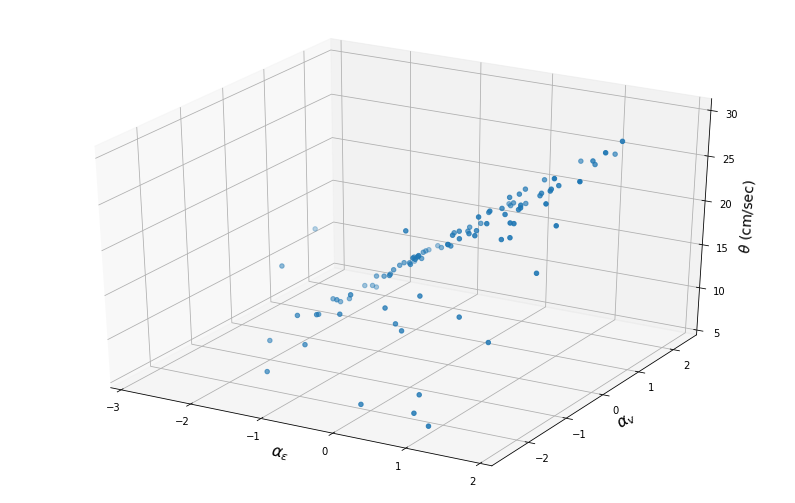

In [14]:

##pivot_numpy = np.concatenate((np.zeros(9)[:, np.newaxis], pivot_numpy), axis=1)
ecu_100_alpha_frag, Vult_100_alpha_frag = zip(*NLTHA100_pivot.index.values)
ecu_100_alpha_frag, Vult_100_alpha_frag = np.asarray(ecu_100_alpha_frag), np.asarray(Vult_100_alpha_frag)

result_100_list = []
theta_100_list = []
beta_100_list = []

IM = np.arange(0,45,5)
fragility_table = pd.DataFrame(columns = ['0','5','10','15','20','25','30','35','40'])
z_list = []

def frag(thetabeta):
    estimated_fragility = sp.norm.cdf(np.log(factor_list),np.log(thetabeta[0]),thetabeta[1])
    log_likelihood = np.log(sp.binom.pmf(pcllps*nrcrds,nrcrds,estimated_fragility))
    fun = -np.sum(log_likelihood)

    return fun

for i,ecu_i in enumerate(ecu_100_alpha_frag):
    factor_list = np.array([0,5,10,15,20,25,30,35,40])
    pcllps = NLTHA100_pivot.iloc[i]
    nrcrds = 12
    ncllps = pcllps*nrcrds

    # starting guess
    theta, beta = 24,0.4
    
    # Bounds
    bnds = ((4, 50), (0.2, 1))

    thetabeta_start = [theta,beta]
    
    result = spo.minimize(frag,thetabeta_start,options={'disp': True},bounds=bnds)

    if result.success:
        miny = result.x
        theta_mxlk = round(miny[0],2)
        beta_mxlk = round(miny[1],2)
        theta_100_list.append(theta_mxlk)
        beta_100_list.append(beta_mxlk)

        z_mxlk = -round(result.fun,2)
        z_list.append(z_mxlk)
        fragility_table.loc[i] = sp.norm.cdf(np.log(IM),np.log(theta_mxlk),beta_mxlk)

theta_100_list = np.array(theta_100_list)
beta_100_list = np.array(beta_100_list)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
ax.scatter(ecu_100_alpha_frag, Vult_100_alpha_frag, theta_100_list)
ax.set_zlabel(r"$\theta$ (cm/sec)",fontsize=14)
ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)
fig.show()


[ 0.          0.26644779  0.15580008 -0.08292142  0.09202848 -0.10803784]
0.3034586854433362


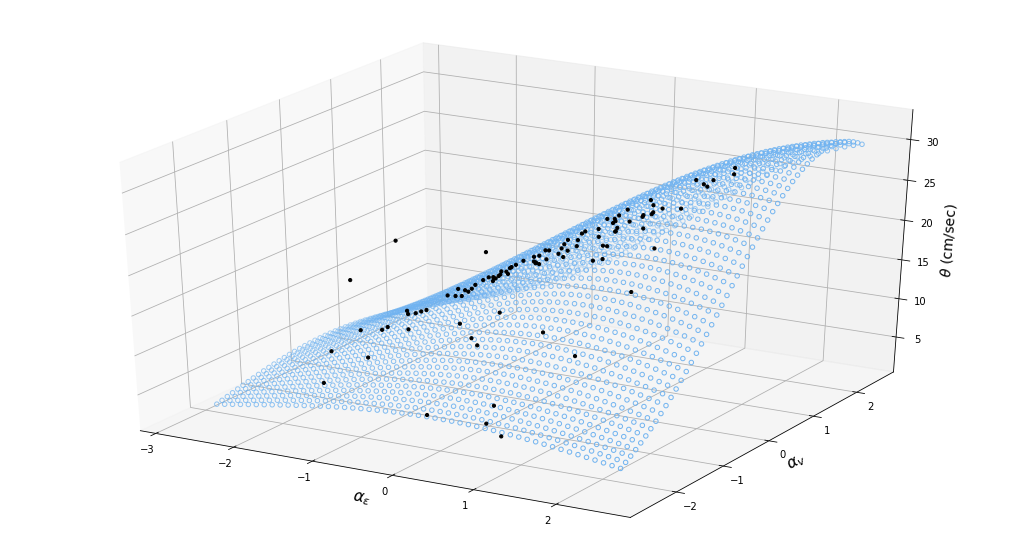

In [17]:
dgr = 2

x_1,x_2 = map(list,zip(*NLTHA100_pivot.index.values))
x_values =np.column_stack((x_1,x_2))
y_values = np.log(theta_100_list)
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, train_size=0.7, test_size=0.3)

poly_model = PolynomialFeatures(degree=dgr)
poly_x_train = poly_model.fit_transform(X_train)
poly_x_test = poly_model.fit_transform(X_test)

# should be in the form [1, a, b, a^2, ab, b^2]
poly_model.fit(poly_x_train, y_train)
regression_model = LinearRegression()
regression_model.fit(poly_x_train, y_train)
print(regression_model.coef_)

y_pred = regression_model.predict(poly_x_test)
#p00,p10,p01,p20,p11,p02 = regression_model.coef_.T
MSE = mean_squared_error(y_test, y_pred, squared=False)
print(MSE)


x1_mesh,x2_mesh = np.linspace(-2.5, 2.5, 50), np.linspace(-2.5, 2.5, 50)
x1_mesh, x2_mesh = np.meshgrid(x1_mesh, x2_mesh)
x_mesh = np.array([x1_mesh.flatten(), x2_mesh.flatten()]).T
poly_x_mesh = poly_model.fit_transform(x_mesh)
y_mesh = regression_model.predict(poly_x_mesh)

fig, ax = plt.subplots(figsize =(18,10), subplot_kw={'projection': '3d'})


ax.set_zlabel(r"$\theta$ (cm/sec)",fontsize=14)
ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)

ax.scatter(x_values[:,0], x_values[:,1], np.exp(y_values),color='black',marker='.',alpha=1,s=40)
ax.scatter(x1_mesh, x2_mesh, np.exp(y_mesh), facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')


In [23]:
x1_mesh,x2_mesh = np.linspace(-2.5, 2.5, 50), np.linspace(-2.5, 2.5, 50)
x1_mesh, x2_mesh = np.meshgrid(x1_mesh, x2_mesh)
x_mesh = np.array([x1_mesh.flatten(), x2_mesh.flatten()]).T


def mesh_maker(degree):
    poly_model = PolynomialFeatures(degree)
    poly_x_train = poly_model.fit_transform(X_train)
    poly_x_test = poly_model.fit_transform(X_test)
    # should be in the form [1, a, b, a^2, ab, b^2]
    poly_model.fit(poly_x_train, y_train)
    regression_model = LinearRegression()
    regression_model.fit(poly_x_train, y_train)
    y_pred = regression_model.predict(poly_x_test)
    #p00,p10,p01,p20,p11,p02 = regression_model.coef_.T
    MSE = mean_squared_error(y_test, y_pred, squared=False)

    poly_x_mesh = poly_model.fit_transform(x_mesh)
    y_mesh = regression_model.predict(poly_x_mesh)
    return y_mesh

fig = go.Figure()

fig.add_trace(
              go.Scatter3d(x=ecu_100_alpha_frag, y=Vult_100_alpha_frag, z=theta_100_list,mode='markers',marker_size=1.5,marker_color='gray',opacity=0.7))

for dgr, clrscl,lbl in zip([2,3,4],["Sunsetdark","Viridis","emrld"],['2nd degree','3rd degree','4th degree']):
    fig.add_trace(                       
                  go.Scatter3d(x=x_mesh[:,0], y=x_mesh[:,1], z=np.exp(mesh_maker(dgr)),mode='markers',marker_size=1,marker_color='silver',opacity=0.5,visible=False))

    fig.add_trace(
                  go.Mesh3d(x=x_mesh[:,0], y=x_mesh[:,1], z=np.exp(mesh_maker(dgr))
                            ,opacity=0.4, contour_show=True,
                            intensity=np.exp(mesh_maker(3)),
                            colorscale=clrscl,visible=False))


fig.update_layout(scene = dict(
                              xaxis_title=r"alpha_ecu",
                              yaxis_title='alpha_Vult',
                              zaxis_title=r"$\theta$ (cm/sec)"),
                              width=800,
                              height=600,
                              legend=dict(itemclick=False),
                showlegend=False,
                autosize=False,
                margin=dict(t=40, b=0, l=0, r=0)
                )

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Just points",
                     method="update",
                     args=[{"visible": [True,False, False, False, False, False, False]},
                           {"title": "No model",
                            "annotations": []}]),
                dict(label="2nd degree",
                     method="update",
                     args=[{"visible": [True,True, True, False, False, False, False]},
                           {"title": "2nd degree model",
                            "annotations": []}]),
                dict(label="3th degree",
                     method="update",
                    args=[{"visible": [True,False, False, True, True, False, False]},
                           {"title": "3rd degree model",
                            "annotations": []}]),
                dict(label="4th degree",
                     method="update",
                     args=[{"visible": [True,False, False, False, False, True, True]},
                           {"title": "4th degree model",
                            "annotations":  []}]),
            ]),
        )
    ])

fig.show()

# Add dropdown



0.18728712827509844
0.8688618094559091


0.38357579982738477
0.7985720973058283


0.3652734011896257
0.9144926629390692




'\n## graphing residual plot\n\ny_test_residual = (y_test_pred-y_test)\n\n\nfig = plt.figure(figsize =(14, 9))\nax = plt.axes(projection =\'3d\')\n\n\nax.set_xlabel(r"$\x07lpha_\\epsilon$",fontsize=16)\nax.set_ylabel(r"$\x07lpha_v$",fontsize=16)\nax.set_zlabel(r"$\theta$ residual (cm/sec)",fontsize=14)\nax.set_zlim(-1,1)\n\nax.scatter(x_values[:,0], x_values[:,1], (y_pred-y_values)/y_values,color=\'black\',marker=\'.\',alpha=1,s=70)\nax.scatter(test_x[:,0], test_x[:,1], y_test_residual/y_test,color=\'black\',marker=\'.\',alpha=0.25,s=70)\n'

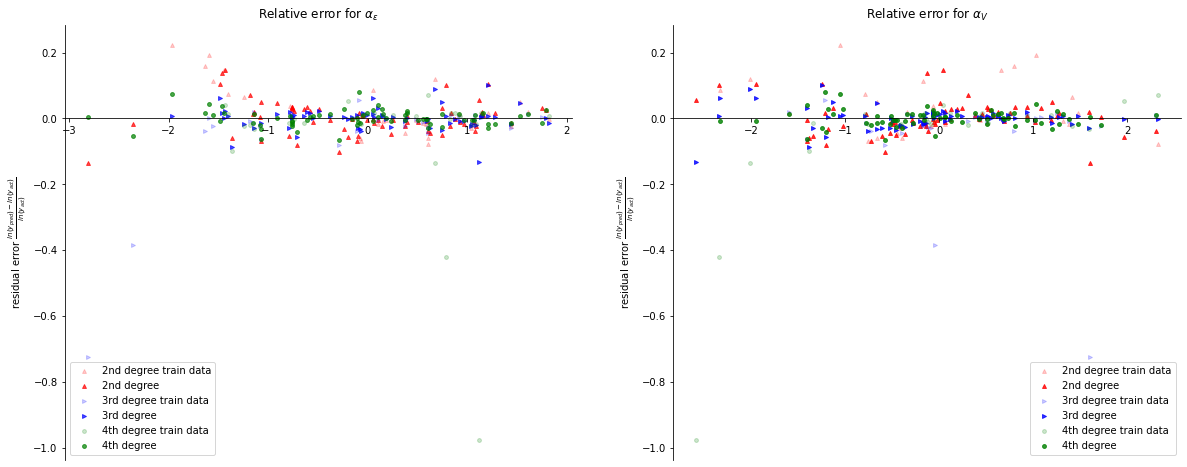

In [80]:
######## testing phase ################

## preparing data

fig,ax = plt.subplots(1,2,figsize=(20,8))

for lbl,clr,dgr,mrkr in zip(['2nd degree','3rd degree','4th degree'],['red','blue','green'],[2,3,4],['^','>','o']):
    X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, train_size=0.7, test_size=0.3)

    poly_model = PolynomialFeatures(degree=dgr)

    poly_x_train = poly_model.fit_transform(X_train)
    poly_x_test = poly_model.fit_transform(X_test)
    #[1, a, b, a^2, ab, b^2]
    poly_model.fit(poly_x_train, y_train)
    regression_model = LinearRegression()
    regression_model.fit(poly_x_train, y_train)
    y_train_pred = regression_model.predict(poly_x_train)
    y_pred = regression_model.predict(poly_x_test)
    #p00,p10,p01,p20,p11,p02 = regression_model.coef_.T
    MSE = mean_squared_error(y_test, y_pred, squared=False)
    print(MSE)
 
    r2 = r2_score(np.exp(y_test), np.exp(y_pred))
    y_test_residual = (y_pred-y_test)/y_test
    y_train_residual = (y_train_pred-y_train)/y_train

    print(r2)
    ax[0].scatter(X_test[:,0],y_test_residual,color=clr,s=15,label=lbl+' (train data)',alpha=0.2,marker=mrkr)
    ax[0].scatter(X_train[:,0],y_train_residual,color=clr,s=15,label=lbl,alpha=0.7,marker=mrkr)
    ax[0].spines['bottom'].set_position('zero')
    ax[0].spines['right'].set_color('none')
    ax[0].spines['top'].set_color('none')
    ax[0].set_title(r"Relative error for $\alpha_\epsilon$")
    ax[0].set_ylabel(r"residual error $\frac{ln(y_{pred})-ln(y_{act})}{ln(y_{act})}$")
    ax[0].legend()

    ax[1].scatter(X_test[:,1],y_test_residual,color=clr,s=15,label=lbl+' (train data)',alpha=0.2,marker=mrkr)
    ax[1].scatter(X_train[:,1],y_train_residual,color=clr,s=15,label=lbl,alpha=0.8,marker=mrkr)
    ax[1].spines['bottom'].set_position('zero')
    ax[1].spines['right'].set_color('none')
    ax[1].spines['top'].set_color('none')
    ax[1].set_title(r"Relative error for $\alpha_V$")
    ax[1].set_ylabel(r"residual error $\frac{ln(y_{pred})-ln(y_{act})}{ln(y_{act})}$")
    ax[1].legend()


    print('\n')
'''
## graphing residual plot

y_test_residual = (y_test_pred-y_test)


fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')


ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)
ax.set_zlabel(r"$\theta$ residual (cm/sec)",fontsize=14)
ax.set_zlim(-1,1)

ax.scatter(x_values[:,0], x_values[:,1], (y_pred-y_values)/y_values,color='black',marker='.',alpha=1,s=70)
ax.scatter(test_x[:,0], test_x[:,1], y_test_residual/y_test,color='black',marker='.',alpha=0.25,s=70)
'''

Model is set from [-1,1] range only

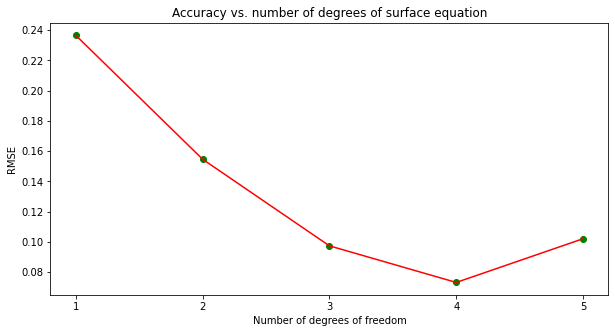

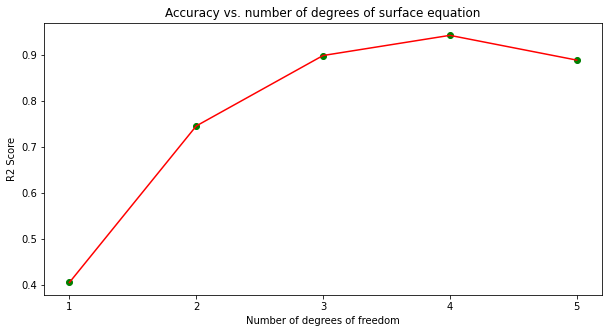

In [121]:
number_degrees = [1,2,3,4,5]
plt_mean_squared_error = []
plt_r2_score = []
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, train_size=0.7, test_size=0.3, random_state=2022)

for dgr in number_degrees:
    poly_model = PolynomialFeatures(degree=dgr)
    poly_x_train = poly_model.fit_transform(X_train)
    poly_x_test = poly_model.fit_transform(X_test)
    #[1, a, b, a^2, ab, b^2]
    poly_model.fit(poly_x_train, y_train)
    regression_model = LinearRegression()
    regression_model.fit(poly_x_train, y_train)
    y_test_pred = regression_model.predict(poly_x_test)
    r2 = r2_score(y_test, y_test_pred)

    plt_mean_squared_error.append(mean_squared_error(y_test, y_test_pred, squared=False))
    plt_r2_score.append(r2)


fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(number_degrees,plt_mean_squared_error, color="green")
ax.plot(number_degrees,plt_mean_squared_error, color="red")
ax.xaxis.get_major_locator().set_params(integer=True)
ax.set_xlabel('Number of degrees of freedom')
ax.set_ylabel('RMSE')
ax.set_title('Accuracy vs. number of degrees of surface equation')

fig,ax = plt.subplots(figsize=(10,5))  
ax.scatter(number_degrees,plt_r2_score, color="green")
ax.plot(number_degrees,plt_r2_score, color="red")
ax.xaxis.get_major_locator().set_params(integer=True)
ax.set_xlabel('Number of degrees of freedom')
ax.set_ylabel('R2 Score')
ax.set_title('Accuracy vs. number of degrees of surface equation')

fig.show()

In [123]:
from sklearn.linear_model import LogisticRegression

number_degrees = [1,2,3,4,5]
plt_mean_squared_error = []
plt_r2_score = []
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, train_size=0.7, test_size=0.3, random_state=2022)

for dgr in number_degrees:
    poly_model = PolynomialFeatures(degree=dgr)
    poly_x_train = poly_model.fit_transform(X_train)
    poly_x_test = poly_model.fit_transform(X_test)
    #[1, a, b, a^2, ab, b^2]
    poly_model.fit(poly_x_train, y_train)
    regression_model = LogisticRegression()
    regression_model.fit(X_train, y_train)
    y_test_pred = regression_model.predict(poly_x_test)
    r2 = r2_score(y_test, y_test_pred)

    plt_mean_squared_error.append(mean_squared_error(y_test, y_test_pred, squared=False))
    plt_r2_score.append(r2)


fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(number_degrees,plt_mean_squared_error, color="green")
ax.plot(number_degrees,plt_mean_squared_error, color="red")
ax.xaxis.get_major_locator().set_params(integer=True)
ax.set_xlabel('Number of degrees of freedom')
ax.set_ylabel('RMSE')
ax.set_title('Accuracy vs. number of degrees of surface equation')

fig,ax = plt.subplots(figsize=(10,5))  
ax.scatter(number_degrees,plt_r2_score, color="green")
ax.plot(number_degrees,plt_r2_score, color="red")
ax.xaxis.get_major_locator().set_params(integer=True)
ax.set_xlabel('Number of degrees of freedom')
ax.set_ylabel('R2 Score')
ax.set_title('Accuracy vs. number of degrees of surface equation')

fig.show()

ValueError: ignored